            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
   Real Values  Predicted Values
0        45000      53356.643357
1        50000      31759.906760
2        60000      58642.191142
3        80000      94632.867133
4       110000     121724.941725
5       150000     143275.058275
6       200000     184003.496504
7       300000     289994.172494
8       500000     528694.638695
9      1000000     988916.083916


<ipython-input-1-c228da0a215d>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


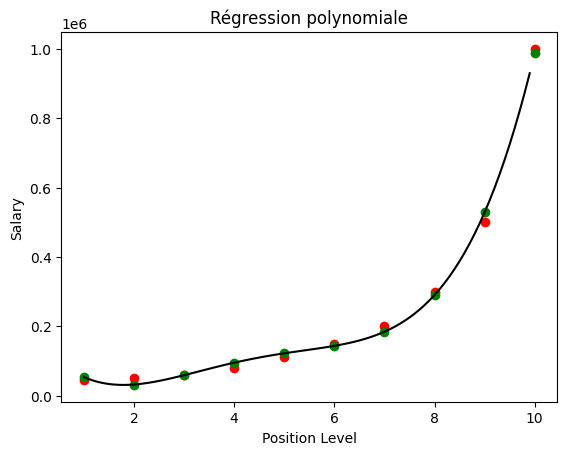

In [1]:
# Importer les bibliothèques nécessaires
#partie1 ex3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Charger le dataset
dataset = pd.read_csv('Position_Salaries.csv')

# Définir les variables indépendantes (X) et dépendantes (y)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# Afficher les premières lignes du dataset
print(dataset.head(5))  # Correction : ajout de print() pour afficher

# Créer un modèle de régression polynomiale (degré 4)
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Prédire les valeurs
y_pred = lin_reg.predict(X_poly)

# Comparer les valeurs réelles et prédites dans un DataFrame
df = pd.DataFrame({'Real Values': y, 'Predicted Values': y_pred})
print(df)  # Correction : ajout de print() pour afficher le DataFrame

# Création d'un espace de valeurs pour une courbe plus lisse
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

# Visualisation des résultats
plt.scatter(X, y, color='red')  # Points réels
plt.scatter(X, y_pred, color='green')  # Points prédits
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color='black')  # Courbe de régression

# Ajouter des titres et labels
plt.title('Régression polynomiale')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()